# EDA

In [ ]:
df = pd.read_parquet("/content/drive/MyDrive/datasets/reddit_parser_2024-10-26_01-09-50.parquet")
df.head()

,id,title,url,subreddit,created_utc,parsed_utc,text,score,num_comments,type,parent_id
0,1gc59dz,Killam Apartment REIT (KMP-UN.TO) residential ...,https://www.reddit.com/r/ValueInvesting/commen...,valueinvesting,2024-10-25 21:28:56,2024-10-26 01:00:01,"Hey all, \n\nHoping someone may have some insi...",2,1.0,submission,None
1,ltreavu,None,None,valueinvesting,2024-10-25 22:41:00,2024-10-26 01:00:01,REITs often trade below book value during peri...,1,NaN,comment,1gc59dz
2,1gc4xe1,Methode Electronics (MEI) - Great Long Term Va...,https://www.reddit.com/r/ValueInvesting/commen...,valueinvesting,2024-10-25 21:13:44,2024-10-26 01:00:01,Hi guys - so I figured I'd post another intere...,1,2.0,submission,None
3,ltr96s4,None,None,valueinvesting,2024-10-25 22:10:06,2024-10-26 01:00:01,This is a 2x if you look past the noise here. ...,2,NaN,comment,1gc4xe1
4,ltrgv9n,None,None,valueinvesting,2024-10-25 22:56:39,2024-10-26 01:00:01,This is a solid deep value play. The 0.42 P/B ...,1,NaN,comment,1gc4xe1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13036 entries, 0 to 13035
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            13036 non-null  object 
 1   title         975 non-null    object 
 2   url           975 non-null    object 
 3   subreddit     13036 non-null  object 
 4   created_utc   13036 non-null  object 
 5   parsed_utc    13036 non-null  object 
 6   text          13036 non-null  object 
 7   score         13036 non-null  int64  
 8   num_comments  975 non-null    float64
 9   type          13036 non-null  object 
 10  parent_id     12061 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.1+ MB


In [ ]:
df.describe(include='all')

,id,title,url,subreddit,created_utc,parsed_utc,text,score,num_comments,type,parent_id
count,13036,975,975,13036,13036,13036,13036,13036.000000,975.000000,13036,12061
unique,13036,974,975,1,13006,524,12639,NaN,NaN,2,899
top,1gc59dz,Does Anyone Do Modeling For Their Personal Inv...,https://www.reddit.com/r/ValueInvesting/commen...,valueinvesting,2024-09-29 03:23:18,2024-10-26 01:09:38,[deleted],NaN,NaN,comment,1f8pl9b
freq,1,2,1,13036,2,273,90,NaN,NaN,12061,272
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.693694,29.404103,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.138557,50.671779,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-22.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,4.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,11.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,33.000000,NaN,NaN


Средняя длина текста: 328.4054924823566
Минимальная длина текста: 0
Максимальная длина текста: 39332


<Axes: >

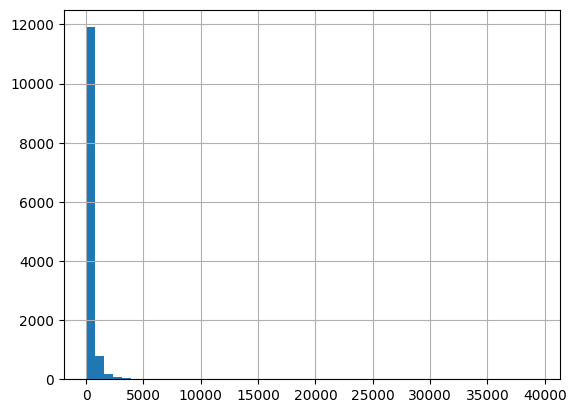

In [ ]:
df['text_length'] = df['text'].apply(lambda x: len(x))

mean_text_length = df['text_length'].mean()
min_text_length = df['text_length'].min()
max_text_length = df['text_length'].max()

print(f"Средняя длина текста: {mean_text_length}")
print(f"Минимальная длина текста: {min_text_length}")
print(f"Максимальная длина текста: {max_text_length}")

df['text_length'].hist(bins=50)

In [ ]:
import nltk
from nltk import ngrams, sent_tokenize
from collections import Counter
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('punkt')

all_text = df['text'].str.cat(sep=' ').lower()
all_words = all_text.split()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
char_counts = Counter(all_text)
print("Частотный анализ символов:")
for char, count in char_counts.most_common(10):
    print(f"'{char}': {count}")

Частотный анализ символов:
' ': 725233
'e': 382273
't': 310786
'a': 264288
'o': 258925
'i': 258036
'n': 235832
's': 226824
'r': 195650
'h': 142141


In [ ]:
num_words = len(all_words)
avg_word_length = sum(len(all_words) for all_words in all_words) / num_words
print(f"\nОбщее количество слов: {num_words}")
print(f"Средняя длина слова: {avg_word_length:.2f}")


Общее количество слов: 730957
Средняя длина слова: 4.84


In [ ]:
word_counts = Counter(all_words)

print("Most common words:")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")

Most common words:
the: 28361
to: 17886
and: 17248
a: 17065
of: 13231
is: 12598
in: 11882
i: 10596
for: 7374
you: 7238


In [ ]:
bigrams = list(ngrams(all_words, 2))

bigram_counts = Counter(bigrams)

print("Most common bigrams:")
for bigram, count in bigram_counts.most_common(10):
    print(f"{bigram}: {count}")

Most common bigrams:
('in', 'the'): 2935
('of', 'the'): 2096
('is', 'a'): 1298
('if', 'you'): 1189
('to', 'be'): 1014
('on', 'the'): 979
('the', 'market'): 899
('for', 'the'): 899
('i', 'think'): 895
('the', 'company'): 894


In [ ]:
trigrams = list(ngrams(all_words, 3))

trigram_counts = Counter(trigrams)

print("Most common trigrams:")
for trigram, count in trigram_counts.most_common(10):
    print(f"{trigram}: {count}")

Most common trigrams:
('a', 'lot', 'of'): 592
('one', 'of', 'the'): 190
('there', 'is', 'a'): 172
('the', 'company', 'is'): 164
('this', 'is', 'a'): 162
('the', 'market', 'is'): 161
('you', 'want', 'to'): 159
('if', 'you', 'are'): 145
('look', 'at', 'the'): 129
('to', 'invest', 'in'): 125


In [ ]:
sentences = sent_tokenize(all_text, language='english')
num_sentences = len(sentences)
avg_sentence_length = num_words / num_sentences
print(f"\nОбщее количество предложений: {num_sentences}")
print(f"Средняя длина предложения (в словах): {avg_sentence_length:.2f}")


Общее количество предложений: 42946
Средняя длина предложения (в словах): 17.02


In [ ]:
nlp = spacy.load("en_core_web_sm")

pos_counts = Counter()
for doc in nlp.pipe(df['text'].tolist()):
    pos_counts.update([token.pos_ for token in doc])

print("\nРаспределение частей речи:")
for pos, count in pos_counts.items():
    print(f"{pos}: {count}")



Распределение частей речи:
INTJ: 1486
PRON: 70516
PUNCT: 100057
SPACE: 20295
VERB: 96180
AUX: 53399
DET: 58302
NOUN: 163915
ADP: 75899
SCONJ: 18271
ADJ: 62072
ADV: 43660
PART: 23294
PROPN: 42759
SYM: 6212
NUM: 19182
X: 3294
CCONJ: 26527


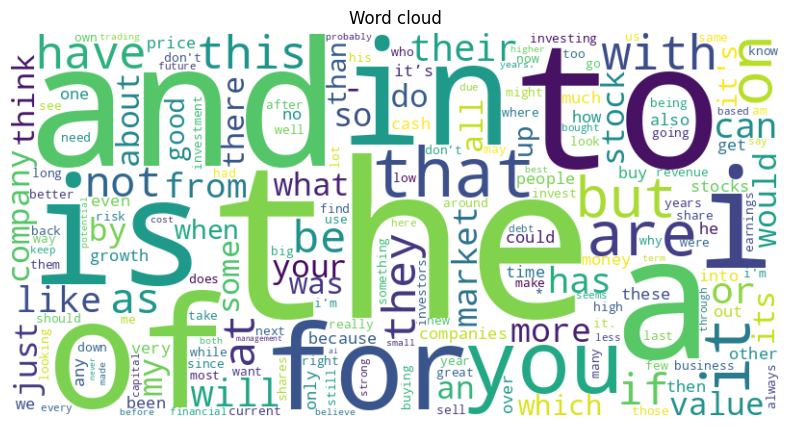

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word cloud")
plt.show()


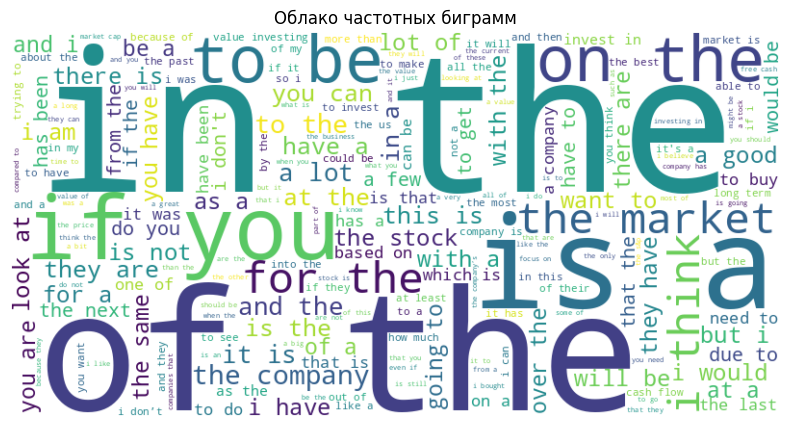

In [ ]:
bigram_dict = {" ".join(bigram): count for bigram, count in bigram_counts.items()}

bigram_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_dict)

plt.figure(figsize=(10, 5))
plt.imshow(bigram_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Bigram cloud")
plt.show()